In [ ]:
%matplotlib inline
import numpy as np
import pylab as pl

def make_test_data(seg_count, point_count):
    x = np.random.uniform(2, 10, seg_count)
    x = np.cumsum(x)
    x *= 10 / x.max()
    y = np.cumsum(np.random.uniform(-1, 1, seg_count))
    X = np.random.uniform(0, 10, point_count)
    Y = np.interp(X, x, y) + np.random.normal(0, 0.05, point_count)
    return X, Y

In [ ]:
X = np.array([1, 2, 3, 4])
Y = np.array([5, 6, 7, 8])

In [ ]:
seg = np.full(4, (X.max()-X.min()) / 4)

In [ ]:
np.r_[np.r_[X.min(), seg].cumsum(), X.max()]

In [ ]:
Y[np.abs(X - 1) < (X.max() - X.min()) * 0.01].mean()

In [ ]:
np.abs(X - 1) < (X.max() - X.min()) * 0.01

In [ ]:
np.array([Y[np.abs(X - x) < (X.max() - X.min()) * 0.01].mean() for x in px_init])

In [65]:
from scipy import optimize

def segments_fit(X, Y, count):
    xmin = X.min()
    xmax = X.max()

    # Create representation of knots
    seg = np.full(count - 1, (xmax - xmin) / count)

    # 
    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)

In [ ]:
X, Y = make_test_data(10, 2000)
px, py = segments_fit(X, Y, 8)

pl.plot(X, Y, ".")
pl.plot(px, py, "-or");

In [ ]:
X = np.random.uniform(0, 10, 2000)
Y = np.sin(X) + np.random.normal(0, 0.05, X.shape)
px, py = segments_fit(X, Y, 8)
pl.plot(X, Y, ".")
pl.plot(px, py, "-or");

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
# df = pd.read_csv('../data/pw_data3_5000.csv')
# ss  = MinMaxScaler()
# foo = ss.fit_transform(df)
# foo = pd.DataFrame(foo)

df = pd.read_csv('../data/us_covid19_daily.csv')
df['deathIncrease'] = df['deathIncrease'].astype(int)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['unixTime'] = df['date'].astype(int) / 10**9
df = np.array(df[['unixTime', 'deathIncrease']])

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

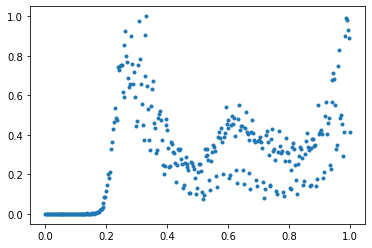

In [77]:
px, py = segments_fit(foo[0], foo[1], 5)
pl.plot(foo[0], foo[1], ".")
# pl.plot(px, py, "-or")

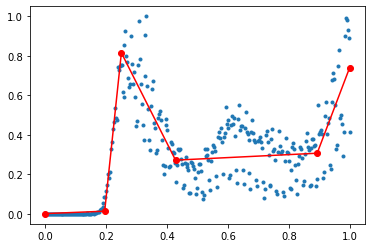

In [78]:
pl.plot(foo[0], foo[1], ".")
pl.plot(px, py, "-or")

In [93]:
np.sqrt(np.mean((np.interp(foo[0], px, py) - foo[1])**2))

0.11677024446340475

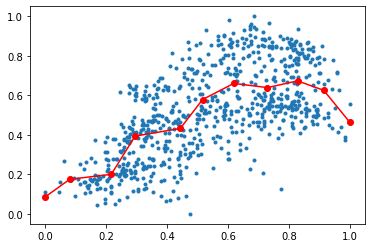

In [75]:
df = pd.read_csv('../data/Bike-Sharing-Dataset/day.csv')
df = df[['temp', 'cnt']]

ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

px, py = segments_fit(foo[0], foo[1], 10)
pl.plot(foo[0], foo[1], ".")
pl.plot(px, py, "-or")